<link href="https://fonts.googleapis.com/css2?family=Montserrat:wght@100..900&display=swap" rel="stylesheet">

<h1 style="font-family: 'Montserrat', sans-serif; font-size:40px; color:#01753a; text-align: center;">
    Understanding the Relationship between Corn Expansion and Deforestation
</h1>
<p style="font-family: 'Trebuchet', sans-serif; font-size:12px;text-align:right"> December 2024 </p>
<hr>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;">Nadège Baertschi, Zélia Décaillet, Simon Dutruy, Mert Ülgüner</p>

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Lifecycle_study.png" alt="Structure of the article" width="1000">

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">To guide you through our research, we’ve structured the study like the growth of a tree, as shown above. Each stage represents a key step in our journey.

# Table of Content
01. [Why does this study matter? Our hypothesis](#01-Watering-the-Soil)
02. [What data are we working with?](#02-Planting-the-Seed)
03. [Initial insights : what does the data reveal?](#03-Breaking-Ground)
04. [Building the statistical model](#04-Growing-the-Shoot)
05. [How robust is the model? Tackling endogeneity](#05-Strengthening-the-Trunk)
06. [How uniform is the relationship across our database? Tackling heterogeneity](#06-Branching-Out)
07. [Discussion: How should we interpret our results?](#07-Growing-the-Foliage)
08. [What are the limitations of our study and its potential extensions?](#08-Reaching-the-Canopy)
09. [Appendices](#Appendices)

# 01 Watering the Soil
[Table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section1.png" alt="Structure of the article" width="150">

## Why does this study matter? 🧐

<div style="background-color: #deefbb;color:#000000; padding: 10px; text-align:center;border-radius: 5px;font-family: 'Trebuchet', bold, sans-serif; font-size:14px;">
    <b>Did you know that the annual rate of deforestation in 2022 was equivalent to deforesting 15 football (soccer) fields per minute? </b> <p style="font-family: 'Trebuchet', sans-serif; font-size:12px;text-align:right">(State of climate action 2023)</p>
</div>
 
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">We all know forests' crucial role in absorbing and storing carbondioxide and hosting immense biodiversity. Therefore it is not surprising that each year, forest loss releases nearly <b>5 billion tons of carbon dioxide</b>, which is equivalent to around 10% of all human-caused emissions (Gibbs et al., 2018).   

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> Deforestation is, therefore, a double-edged sword in our fight against climate change. Not only does it reduce the ability of forests to absorb greenhouse gases, but it also becomes a direct source of emissions, speeding up global warming. <b>So, what’s causing this destruction?</b> </p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Why can cornfield expansion be a driver of deforestation?</b> </p>

<figure style="text-align: center;">
  <img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Sub_defor.png" alt="Hypothesis" width="450">
  <figcaption style="font-family: 'Trebuchet', sans-serif; font-size:14px; color: #555;">
    Figure 1: Deforestation due to cornfield expansion
  </figcaption>
</figure>


<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> Agricultural activities, like meat and palm oil production, are recognized drivers of deforestation. In our analysis, we decided to focus on corn cultivation. This choice is driven by the growing importance of cereals in the future and more specifically corn. The awareness of the environmental impact of palm oil has risen quite a bit in the last decades and society is shifting away from meat and animal-based products (Salehi et al., 2023). Corn is versatile due to its wide-range use in food, biofuels, and animal feed products. </p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> Another crucial source of cornfield expansion is <b>monocropping</b>.  This technique is used globally for corn cultivation but it causes fast depletion of soil fertility due to repeated use of identical artificial fertilizers. Since forest soil is an organic and mineral-rich soil type compared to cropland and grassland areas (figure 2), farmers are further incentivized to expand their cornfields into forested areas, contributing to deforestation.</p>

<figure style="text-align: center;">
  <img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/soil_fert.png" alt="Hypothesis" width="450">
  <figcaption style="font-family: 'Trebuchet', sans-serif; font-size:14px; color: #555;">
    Figure 2: Soil Fertility of Different Soil Types
  </figcaption>
</figure>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> This study focuses on the research question: <b>Can cornfield expansion lead to deforestation?</b> We expect the answer to be yes and to figure this out we are going to leverage statistical methods and regressions.

<figure style="text-align: center;">
    <img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Drivers.png" alt="Hypothesis" width="800">
  <figcaption style="font-family: 'Trebuchet', sans-serif; font-size:14px; color: #555;">
    Figure 3: Drivers Behind Our Hypothesis
  </figcaption>
</figure>

# 02 Planting the Seed
[Table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section2.png" alt="Structure of the article" width="150">

## What data are we working with? 🗃️

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> In this study we are going to be working with two main variables; <b>the area covered by cornfields</b> and <b>by forests</b> which are both in square kilometers (sqkm).</p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">To isolate the specific impact of cornfield expansion on deforestation, control variables, called <b>confounders</b>, in statistics, were added. It helps to get closer to the real effect. Three existing research papers helped us to find potential control variables for the model (Curtis et al., 2018), (Harris et al., 2021) (Bager et al., 2023). From their findings, the following variables were added:</p>

<ul> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Forest:</b> The dependent variable (Y) was not transformed to keep as much variance as possible (especially between the different observations for a given country through time).</li>
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Corn:</b> The main independent variable (X) was transformed using the square root function. This transformation is less extreme than the usual logarithmic one as it compresses the tail of the distribution less and allows us to conserve within-entity variance. </li>
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> GDP:</b> Countries with high GDP may exhibit increased deforestation due to higher demand for agricultural commodities and infrastructure development (Bager et al., 2023). We took the logarithm of GDP as it represents a standard transformation in research.</li> 
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Temperature: </b> The variable represents the average temperature in Celsius degrees (°C) in a country for a given year. It influences both cornfields and forests which affects land-use dynamics. (Bager et al., 2023). </li> 
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Cattle farming: </b> Corn is a primary component of cattle feed. Its cultivation may influence forest conversion as livestock farming exerts pressure on deforestation through crop demand (Curtis et al., 2018) (Harris et al., 2021). It is expressed in thousands of animals.</li> 
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Non-forested Suitable Land Available for Corn Expansion: </b>This variable was constructed to use it as a proxy for the potential areas where corn culture can be expanded (other than forest areas). Countries with low suitable land tend to have a higher pressure exerted on forests to convert into cropland (Foley et al., 2011; Gibbs et al., 2010).</li> </ul>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> All our variables and their relationships are summarized in this figure below: </p>
<figure style="text-align: center;">
  <img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/DAG_v2.png" alt="DAG" width="600">
  <figcaption style="font-family: 'Trebuchet', sans-serif; font-size:14px; color: #555;">
    Figure 4: Direct Acyclic Graph (DAG)
  </figcaption>
</figure>

### Database

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">  We built our dataset relying on two reliable sources: <ul> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <a href="https://www.fao.org/faostat/" target="_blank">FAO Database</a>: Provides detailed statistics on global agricultural production and land coverage, including data on cornfield areas and forest areas. </li> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"><a href="https://ourworldindata.org/" target="_blank">Our World in Data</a>: Provides research and data services to tackle environmental and sustainability issues, in our case the data for temperature.</li></ul>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
Our dataset spans <b>72 countries</b> across five continents and covers the years <b>2000 to 2021</b>. </p>

In [1]:
# Importing the libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import numpy as np
import scipy.stats as stats
import pycountry
import plotly.express as px
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf  # For statistical modeling using R-style formulas
from linearmodels.panel import PanelOLS
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from stargazer.stargazer import Stargazer
from IPython.display import display, HTML


# Importing our pre-built clean database & drop outliers
url = 'https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Database.csv'
df_init = pd.read_csv(url)
df_init.drop(columns='Unnamed: 0',inplace=True)
df = df_init[~df_init["country"].isin(['Brazil', 'Russian Federation', 'China', 'United States of America', 'Canada'])]
df['loggdp'] = np.log(df['gdp'])

/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_5849/863506488.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loggdp'] = np.log(df['gdp'])


### Key considerations

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">Before constructing our model, some considerations need to be taken into account. It is important to acknowledge the potential biases and weaknesses of the data we are working with.</p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">What you need to know:</p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> 

<ul><li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Outliers:</b> 5 countries had extreme values in our panel data, even after different transformations were applied. They were removed from the database, mainly because of their large forest areas and corn production. Therefore being able to find a causal relationship for other countries. The 5 outliers are Brazil, the Russian Federation, China, the United States of America, and Canada (77-5=72 countries).</li> 
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>Geographic Coverage:</b>
The dataset lacks data in Africa and the Middle East but has good coverage of the rest of the world. Dropping 5 of the biggest countries in the world adds low coverage in data in North America and Asia. Europe is one of the most represented continents, which could lead to bias by underestimating the global relationship between corn expansion and deforestation. Europe has a stable or increased forest coverage. This could lead to an imbalance in the results therefore might reflect weaker impacts than observed in regions with different land-use dynamics.</li>


<li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"><b>Imperfect and Omitted variables:</b>
We might expect that numerous different factors may affect our result by upward or downward biases. Although we are going to be able to control their effects for the observed confounders, we are not going to be able to control for the unobserved ones. It is also worth mentioning that the data we use for observed confounder is <b>imperfect</b>.</li></ul>


<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> We describe and discuss the limitations of our data and analysis in more detail later in <a href="#Limitations-of-our-data-and-the-choice-of-our-variables">Section 8</a>.</p>

# 03 Breaking Ground
[Table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section3.png" alt="Structure of the article" width="150">

## Initial insights : what does our data reveal? 🔍

### How did global forest area change over time?

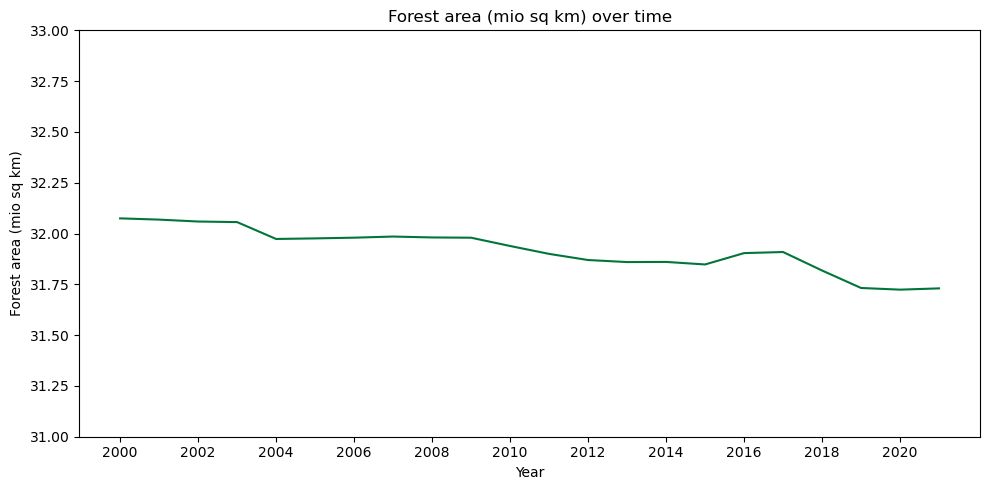

In [179]:
df_init['forestgraph'] = df_init['forest']/1000000 #to avoid scientific notations on graph scales
# Lineplot to highlight the trend of forest area
plt.figure(figsize=(10,5))
forests = df_init.groupby(by='year')['forestgraph'].sum().reset_index()
plt.plot(forests['year'], forests['forestgraph'], color='#01753a')
plt.title('Forest area (mio sq km) over time')
plt.xlabel('Year')
plt.xticks(forests['year'][::2])
plt.ylabel('Forest area (mio sq km)')
plt.ylim(31,33)
plt.tight_layout()
plt.show()

### How did global cornfield area change over time?

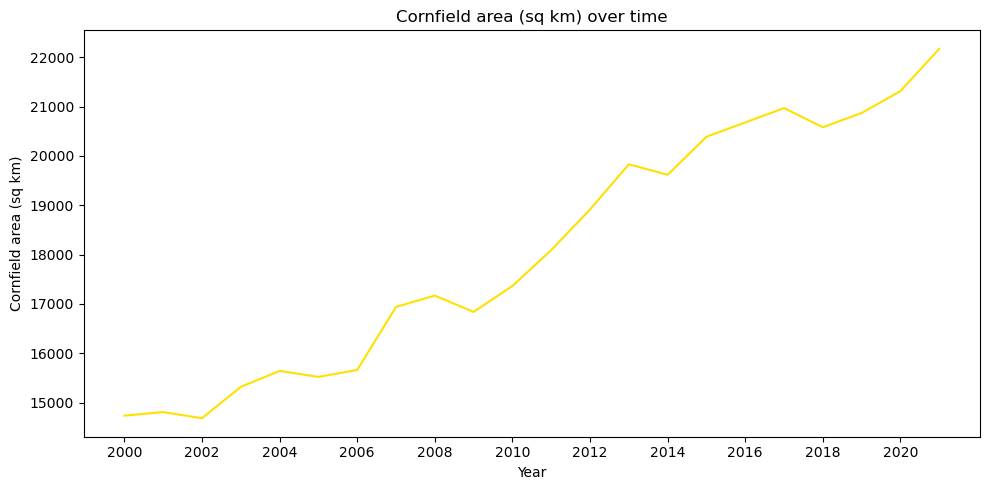

In [180]:
plt.figure(figsize=(10,5))
# Lineplot to highlight the trend of cornfield area
corn_area = df_init.groupby(by='year')['corn'].mean().reset_index()
plt.plot(corn_area['year'],corn_area['corn'],color='#ffe000')
plt.title('Cornfield area (sq km) over time')
plt.xlabel('Year')
plt.xticks(corn_area['year'][::2])
plt.ylabel('Cornfield area (sq km)')
plt.tight_layout()
plt.show()

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">Forest areas have decreased over time <i>(-1.09%)</i> while cornfield areas have massively grown <i>(+50.44%)</i>. This suggests a potential link between the two, aligning with the hypothesis that corn expansion might contribute to forest loss. This doesn’t prove causation but it is enough to prompt a closer look. The analysis is here to determine if there is more than a correlation between the two variables.</p>

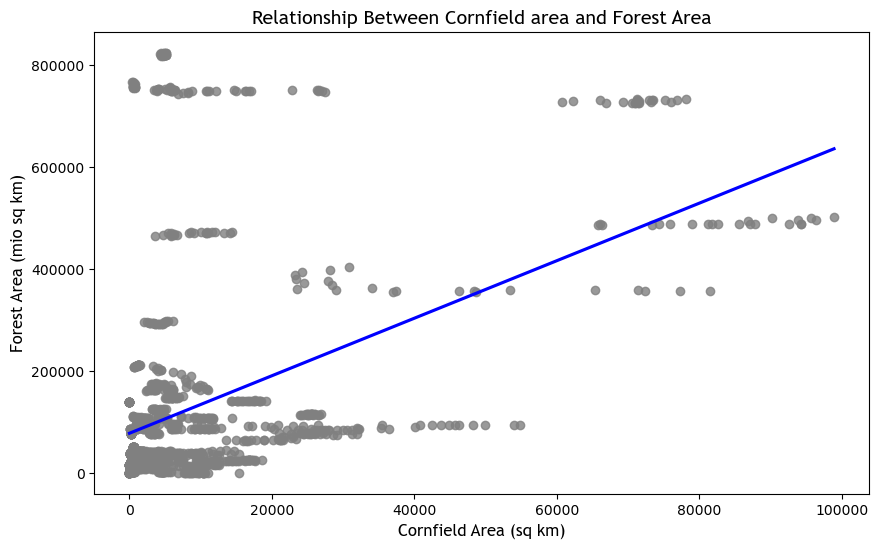

Correlation coefficient between cornfield area & forest area:  0.42 with p-value:  7.267957716053627e-69


In [181]:
# Regression line for the correlation between the two key variables
plt.figure(figsize=(10, 6))
sns.regplot(x='corn',
            y='forest',
            data=df,
            scatter_kws={'color': 'grey'},
            line_kws={'color': 'blue'}, 
            ci=None)
# Labels
plt.xlabel("Cornfield Area (sq km)", fontdict={'fontsize': 12, 'fontname': 'Trebuchet MS'})
plt.ylabel("Forest Area (mio sq km)", fontdict={'fontsize': 12, 'fontname': 'Trebuchet MS'})
plt.title("Relationship Between Cornfield area and Forest Area", fontdict={'fontsize': 14, 'fontname': 'Trebuchet MS'})

# Show the plot
plt.show()

# Correlation coefficient
corr_1, p_value_1 = pearsonr(df['corn'], df['forest'])
print("Correlation coefficient between cornfield area & forest area: ", round(corr_1,2),"with p-value: ", p_value_1)

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">The correlation coefficient of 0.42 means that there is a <b>significant positive linear relationship</b> between our variables with a p-value very close to zero which is the probability that the relationship is purely based on randomness. The expected result was a negative relationship because the intuition was that the higher the cornfield area, the lower the forest area in a country. This could suggest that cornfields and forests are often concentrated in the same countries, such as tropical areas, where both land types coexist. The second possible explanation would be that the large countries wield more cornfields and more forest in absolute terms. In both cases, the results would be driven by country-specific aspects: climate, localization, or size instead of cornfield expansion. </p>



<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">Even though we have valid arguments to explain we have got an positive relationship, the unaccounted confounders can always prevent us isolating the true relationship we are seeking. Therefore, we move beyond correlation and expand our horizons! </p>

# 04 Growing the Shoot
[Table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section4.png" alt="Structure of the article" width="150">

## Building our statistical model 📈

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">The Ordinary Least Squares (OLS) is going to help us isolate the effect of cornfield expansion, giving a clearer picture of the role played in forest loss.</p>

### OLS with control variables and fixed effects (Our baseline model)

$$
\Large {\text{Forest}_{it}} = \beta_0 + \beta_1 \sqrt{\text{Corn}_{it}} + \beta_2^\prime X_{it} + \text{FE}_i + \epsilon_{it}
$$

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> The terms in our OLS model are:</p>
<ul> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"><b>Forest<sub>it</sub>:</b> This is our dependent variable. It refers to the forest area in square kilometers for country <i>i</i> in year <i>t</i></li> 
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> β<sub>0</sub>:</b> The intercept of the model, indicating the expected value of Forest<sub>it</sub> when all other variables are zero.</li> 
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>β<sub>1</sub>:</b> The coefficient β<sub>1</sub> measures the effect of the square root of cornfield area (Corn<sub>it</sub>) on Forest<sub>it</sub>. A negative β<sub>1</sub> would suggest that an increase in cornfield area corresponds to a decrease in forest area </li> 
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> √Corn<sub>it</sub>:</b> The variable of interest denoting the square root of corn areas for country <i>i</i> in year <i>t</i></li> 
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>β<sub>2</sub>′:</b> A row vector of coefficients for each control variable in the vector X<sub>it </li> 
        <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b>X<sub>it</sub>:</b> A column vector of control variables, encompassing GDP, Temperature, and Cattle </li> 
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> FE<sub>i</sub>:</b> The entity fixed effect for each country, capturing time-invariant characteristics of the countries such as country size, climate, or localization. </li> 
    <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> <b> ε<sub>it</sub>:</b> The error term, accounting for the variability in forest area not explained by the independent variables. </li>

In [182]:
# Baseline Regression
est_fe_canned = PanelOLS.from_formula("forest ~ 1 + sqrtcorn + loggdp + Average_Temperature + cattleM + EntityEffects",
                            data=df.set_index(["country", "year"]))
baseline = est_fe_canned.fit(cov_type='clustered', cluster_entity=True)

fei_resid = baseline.resids
fei_fit = baseline.fitted_values
fei_cov = baseline.cov

C:\Users\Mert\AppData\Local\Temp\ipykernel_39508\53778891.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mert\AppData\Local\Temp\ipykernel_39508\53778891.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



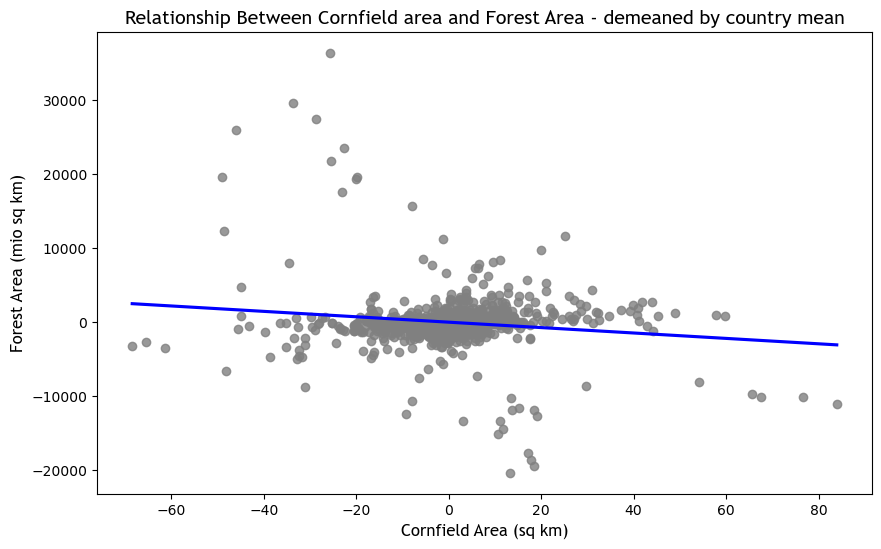

In [183]:
# Adjust forest and corn to account for fixed effects (demeaning) and allow their plotting
df['forest_demeaned'] = df['forest'] - df.groupby('country')['forest'].transform('mean')
df['corn_demeaned'] = df['sqrtcorn'] - df.groupby('country')['sqrtcorn'].transform('mean')

# Regression line for the correlation between the two key variables
plt.figure(figsize=(10, 6))
sns.regplot(x='corn_demeaned',
            y='forest_demeaned',
            data=df,
            scatter_kws={'color': 'grey'},
            line_kws={'color': 'blue'}, 
            ci=None)
# Labels
plt.xlabel("Cornfield Area (sq km)", fontdict={'fontsize': 12, 'fontname': 'Trebuchet MS'})
plt.ylabel("Forest Area (mio sq km)", fontdict={'fontsize': 12, 'fontname': 'Trebuchet MS'})
plt.title("Relationship Between Cornfield area and Forest Area - demeaned by country mean", fontdict={'fontsize': 14, 'fontname': 'Trebuchet MS'})

# Show the plot
plt.show()

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
This plot illustrates the relationship between cornfield area and forest area, after adjusting for country-specific fixed effects by subtracting their country-specific means. 
It tells us that for a <b>given country</b> higher cornfield areas can be associated with lower forest areas which points in the direction that maybe cornfield area expansion indeed causes deforestation which is also supported by the correlation coefficient found below.  

In [184]:
# Correlation coefficient
corr_2, p_value_2 = pearsonr(df['corn_demeaned'], df['forest_demeaned'])
print("Correlation coefficient between cornfield area & forest area: ", round(corr_2,2),"with p-value: ", p_value_2)

Correlation coefficient between cornfield area & forest area:  -0.14 with p-value:  1.830974746172896e-08


### Results of our baseline model

<figure style="text-align: center;">
  <img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Baseline.png" alt="Table 1" width="600">
  <figcaption style="font-family: 'Trebuchet', sans-serif; font-size:14px; color: #555;">
    Table 1: Results of the Baseline Equation
  </figcaption>
</figure>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
Now that we tested how corn expansion affects forest area using our three control variables that can affect both forest areas and cornfield areas (GDP, temperature, and cattle), we see that the coefficient and the correlation between the cornfield area and forest area became negative. For each unit increase of the square root of the cornfield area, the forest area diminishes by -42 sq km. However, we still lack causal evidence as our relationship is very weak. With a p-value = 0.35, our results are far from the usual significance level (p-value < 0.05). Additionally, by seeing the very low R-squared value, we see that we only explain 3% of the total variation of the forest. So our model does not explain the variation of the forest areas and poorly fits the data.

### Should we add time-specific fixed effects?

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
The main factor that time-specific fixed effects account for is the technological infrastructure used in corn cultivation but how does it affect corn production and does it ultimately affect the decision of farmers to expand their cornfield areas?
Due to the advancement in modern sciences; there have been continuous improvements in seed genetics, irrigation systems, pest management, and fertilizers. As a result, the amount of corn produced on each unit of land has increased, enabling farmers to harvest more corn without expanding their fields. Wang and Hu (2021) further examined this relationship and found that technological advancements significantly enhanced corn production efficiency, with technical efficiency stabilizing above 90% by 2015, based on data from 2012 to 2019.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
Under the assumption that the effect of technological advancements is reflected instantly in the data we extracted, adding time-fixed effects can allow us to control for it which leads to a more precise understanding of how corn expansion impacts forest areas.
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> Our second OLS model is therefore:

$$
\Large {\text{Forest}_{it}} = \beta_0 + \beta_1 \sqrt{\text{Corn}_{it}} + \beta_2^\prime X_{it} + \text{FE}_i + \text{FE}_t + \epsilon_{it}
$$

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> The new term of our model:</p>
<ul> <li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
    <b> FE<sub>t</sub>:</b> The time-fixed effect for each year, capturing country-invariant characteristics of the years such as technological innovations</li>

In [185]:
est_fe_canned = PanelOLS.from_formula("forest ~ 1 + sqrtcorn + loggdp + Average_Temperature + cattleM + EntityEffects + TimeEffects",
                            data=df.set_index(["country", "year"]))
fixedEffects = est_fe_canned.fit(cov_type='clustered', cluster_entity=True)

feit_resid = fixedEffects.resids
feit_fit = fixedEffects.fitted_values
feit_cov = fixedEffects.cov

<figure style="text-align: center;">
  <img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/TimeFE.png" alt="Table 2" width="600">
  <figcaption style="font-family: 'Trebuchet', sans-serif; font-size:14px; color: #555;">
    Table 2: Results of the Time FE Equation compared to the baseline Equation</figcaption>
</figure>


<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">We can see that the inclusion of time-specific fixed effects slightly changed our results. The coefficient between corn and forest area remains negative but decreased slightly from -41.915 to -46.007. Our confidence in the result, represented by the p-value, also slightly increased from 0.3494 to 0.3321 (the confidence level is high when the p-value is low). Even with this lower p-value, we still cannot reject the hypothesis that there is no correlation between our variables. While the R-squared value improved slightly from 0.0304 to 0.431, indicating a marginal increase in the model’s ability to explain forest area, the results remain statistically weak.</p>

# 05 Strengthening the Trunk
[Table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section5.png" alt="Structure of the article" width="130">

## How robust is the model? Tackling reverse causality 🦾

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> 
Reverse causality suggests that deforestation creates open land, which drives cornfield expansion.
</p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> 
First, the damage to natural habitats caused by deforestation that might lead to a reduction in cornfield areas was considered. Deforestation can severely reduce bee populations, essential pollinators for 75% of crops. Corn is not affected as 95% of the pollination is wind-pollinated.
</p>  
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> 
Second, human-made deforestation enables cornfield expansion as cleared forest land becomes available for agricultural practices. Natural disasters are disregarded as most of them make the soil unsuitable for corn cultivation. The causes of human-made deforestation are the <b>economic incentives</b> and <b>the requirements of the monocropping system</b> which may incentivize farmers to <b>look out for newly cleared forest areas to expand their cornfield areas</b>.
</p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> 
To address this issue, we lagged the cornfield area. Lagging allows us to capture the delayed effects of agricultural expansion on forests, making our analysis more robust.
</p>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> It means that now our regression model is:</p>

$$
\Large {\text{Forest}_{it}} = \beta_0 + \beta_1 \sqrt{\text{Corn}_{i(t-1)}} + \beta_2^\prime X_{it} + \text{FE}_i + \text{FE}_t + \epsilon_{it}
$$

In [186]:
# Create the lagged variable for logcorn within each country
df['sqrtcorn_lag1'] = df.groupby('country', observed=True)['sqrtcorn'].shift(-1)

# Drop rows belonging to the year 2021
df.dropna(inplace=True)

#Estimate the model
est_fe_canned = PanelOLS.from_formula("forest ~ 1 + sqrtcorn_lag1 + loggdp + Average_Temperature + cattleM + EntityEffects + TimeEffects",
                            data=df.set_index(["country", "year"]))
lagFE = est_fe_canned.fit(cov_type='clustered', cluster_entity=True)

felag_resid = lagFE.resids
felag_fit = lagFE.fitted_values
felag_cov = lagFE.cov

C:\Users\Mert\AppData\Local\Temp\ipykernel_39508\656752216.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mert\AppData\Local\Temp\ipykernel_39508\656752216.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<figure style="text-align: center;">
    <img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Lag.png" alt="Table 3" width="800">
  <figcaption style="font-family: 'Trebuchet', sans-serif; font-size:14px; color: #555;">
    Table 3: Results of the Lagged Equation compared to the previous Equation
  </figcaption>
</figure>

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> In this regression, we see that the lagged variable has a p-value of 0.3036, making it statistically insignificant, which might initially suggest that there is no reverse causality. But the coefficient is still decreasing through the different steps. However, it is still to early to conclude that there is no causal relationship, as we know there are still unobserved factors introducing bias like the <b>country-level deforestation laws and policies aimed at controlling agricultural expansion</b> which causes <b>overestimation</b> in the coefficient in lagged cornfield area.</p>

# 06 Branching Out
[Table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section6.png" alt="Structure of the article" width="125">

## How uniform is the relationship across our database? Tackling heterogeneity 🔁

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> So far, we’ve assumed that the relationship between corn expansion and deforestation is consistent across all countries in our dataset. But is that the case? In order to tackle the heterogeneity problem we are going to analyze the <b>availability of non-forested land for agricultural land expansion </b>. The intuition is that in countries where little suitable land is available for corn expansion, forests may be the only option potentially leading to a stronger relationship between corn expansion and deforestation.</p> 


<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
In this part we are going to use a variable that we described earlier in this study: <b>non-suitable land available for corn expansion other than forests</b> which will serve as a proxy for the constraints countries face when expanding their agricultural land.
We are going to transform the variable so that it will be equal to 1 for country i, if that country has more non-forested suitable land for corn land expansion than the median. Otherwise, the dummy variable is equal to 0. 

We expect a higher relationship between cornfield expansion and forest when countries do not have a lot of potential for corn expansion (dummy=0).</p> 
    
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> Our final model becomes:

$$
\Large {\text{Forest}_{it}} = \beta_0 + \beta_1 \sqrt{\text{Corn}_{i(t-1)}} + \beta_2^\prime X_{it} + \text{FE}_i + \text{FE}_t + \sqrt{\text{Corn}_{i(t-1)}}\times\text{Dummy} + \epsilon_{it}
$$

In [187]:
# Create the dummy variable
df['hetero']= df['suitability'].apply(lambda val: 1 if (val>df['suitability'].median()) else 0)

# Create the interaction term between the dummy variable and the square root of cornfield area
df['hetero_x_sqrtcorn'] = df['sqrtcorn_lag1']*df['hetero']

# Create the regression 
est_fe_canned = PanelOLS.from_formula("forest ~ 1 + sqrtcorn_lag1 + loggdp + Average_Temperature + cattleM + hetero_x_sqrtcorn + EntityEffects + TimeEffects",
                            data=df.set_index(["country", "year"]))
feLagHetero = est_fe_canned.fit(cov_type='clustered', cluster_entity=True)

felaghetero_resid = feLagHetero.resids
felaghetero_fit = feLagHetero.fitted_values
felaghetero_cov = feLagHetero.cov

C:\Users\Mert\AppData\Local\Temp\ipykernel_39508\337800768.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mert\AppData\Local\Temp\ipykernel_39508\337800768.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<figure style="text-align: center;">
    <img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/Hetero.png" alt="Table 4" width="800">  
    <figcaption style="font-family: 'Trebuchet', sans-serif; font-size:14px; color: #555;">
    Table 4: Results of the Equation including heterogeneity dummy compared to the previous Equation</figcaption>
</figure>

<p style="font-family: 'Trebuchet MS', sans-serif; font-size:20px; text-align:center; line-height:1.6;">
  <b>Interaction term alone:</b>
</p>

<p style="font-family: 'Trebuchet MS', sans-serif; font-size:10px; text-align:center; line-height:1.6;">
</p>

$$
\Large \sqrt{\text{Corn}_{i(t-1)}} \times \text{Dummy} = -87.078
$$

$$
\Large p\text{-value} = 0.1414
$$


<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> The results from this final model provide insights into how corn expansion impacts forest area, depending on the availability of unforested land, but goes against our previous intuition that we might see a stronger relationship in countries with little land availability.
    
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> The coefficient for lagged cornfield area &radic;<span style="text-decoration: overline;">corn(t-1)</span> suddenly becomes positive with a value of 24.622. It represents the effect when the dummy variable equals 0, so for countries with limited non-forested suitable land for corn expansion. This positive coefficient suggests that, in these contexts, corn expansion is not strongly associated with deforestation. This is counterintuitive to our previous idea that corn expansion should be a stronger driver of forest loss. This could be because cornfield expansion occurs alongside forest preservation in these countries. The p-value of 0.1842 indicates that this result still not significant, we cannot confidently conclude this relationship exists.

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">The interaction term has a coefficient of -87.078, capturing the additional effect of corn expansion in countries with high non-forested land availability (dummy = 1). Adding this to the baseline coefficient (24.622 - 87.078 = -62.456) reveals a strongly negative relationship between corn expansion and forest area in these countries. However, the p-value for the interaction term (0.1414) shows this result is not statistically significant.

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
These findings support our idea that land availability plays a key role in moderating the relationship between corn expansion and deforestation, but not in the way we thought. In countries with limited land availability, the relationship is weaker or even positive, while in countries with abundant land, corn expansion seems to exert greater pressure on forests. However, due to the lack of statistical significance, these results should be interpreted with caution.

# 07 Growing the Foliage
[Table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section7.png" alt="Structure of the article" width="125">

## Discussion : How should we interpret our results? 🕵️

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
After testing multiple models, we’ve explored whether corn expansion is a driver of deforestation. Let’s reflect on what our results reveal and the challenges they present for proving causality.
<p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
The result of the model supports our hypothesis that cornfields expand on forest area. We had through our analysis a negative relationship, even slightly more negative with each model refinement. However, critical aspects lower the confidence in this conclusion.
<p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
First, the p-values for the cornfield coefficient stay above the threshold of 0.05, although the value decreases after each model. The threshold is commonly used in research to prove “statistical significance” which means that the results are unlikely to be due to random chance.
<p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
Second, our model explains only 6% (R-squared) of the changes in forest areas. It suggests that omitted variables are driven by forest loss. This is one main limitation of our study.
<p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
The heterogeneity dummy has some controversy. Countries with big areas of non-forested land, tend to expand on forest areas. Countries with limited land availability might experience reforestation when cornfield areas expand. However, the lack of statistical significance for these results means they remain <b>speculative rather than conclusive</b>.
<p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
In conclusion, a causal link cannot be proven despite there is a relationship between cornfield expansion and deforestation. The results are not statistically significant and we might have some omitted variables bias that would allow us to establish causality. Corn expansion is a plausible but unconfirmed driver of deforestation.
<p>

# 08 Reaching the Canopy 
[Table of content](#Table-of-Content)

<img src="https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/section8.png" alt="Structure of the article" width="125">

## What are the limitations of our study and its potential extensions? 📝🧩

### Limitations of our data and the choice of our variables

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> It is challenging to determine which variables to include to build the right statistical model. We initially tested several variables beyond GDP, temperature, and cattle farming, such as rainfall, rural population, corn prices, and suitable land available for corn expansion other than forests, but we found their impact on deforestation negligible. Their regression coefficients were close to zero, meaning they had little to no influence. Moreover, removing them didn’t change the effects of the retained variables on deforestation, so we decided to exclude them from our final model. </p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> There’s always the possibility of omitted variable bias, as we mentioned in our <a href="#Key-considerations"> key considerations</a> in Section 3. For instance, anti-deforestation policies limiting agricultural expansion directly impact land-use decisions and could potentially reduce the likelihood of forests being converted into cornfields. The effect of corn expansion on deforestation might be <b>overestimated</b> as they are not included. Moreover, the proxy used for non-forested suitable land available for cornfield expansion is <b>imperfect</b>. It lacks spatial precision and doesn’t account for accessibility. We decided to use it in our analysis as this was the only data that we could find as a proxy on the distance of cornfield with forest without needing to calculate it with satellite data. Consequently, the results can be biased in either direction: overestimating the impact of corn expansion if it underrepresents alternative land availability or underestimating it if it over-represents the suitability of non-forested land. </p>

### Limitations of our models

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> The main issue we have in our model comes from the data itself. We observe very low forestation variation rates inside a given country. This absence of variation in the forest area inside the country causes issues in the mathematical model. It makes the model struggle to find the origin of that variation. To address this issue we could explore new databases or find a relevant linear transformation of our forest area. Furthermore, <b>measurement error</b> in our data can be a major problem in our analysis, as the majority of our data comes from the FAO database, and the overall accuracy is not assessed and yearly updates are made through annual questionnaires coming from the local authorities of each country. </p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">Another key issue with our model is that the residuals, the error terms of our models, are correlated with some variables. This breaks one of the hypotheses of OLS regression, which assumes that residuals and variables are unrelated. This suggests we may still have unresolved endogeneity (hidden factors influencing both corn expansion and deforestation) or that the relationships between our variables are not perfectly linear. Ideally, we would have explored more advanced methods or different ways to model these relationships, but due to time constraints, we were unable to pursue non-OLS techniques commonly used in the research on this topic.</p>

### Potential extensions

<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
Our research provides some insights but other approaches could improve precision. 
First, addressing the <b>omitted variables</b>, such as <b>anti-deforestation policies</b>, could offer a clearer picture of how lans use is decided in each country. Additionally, incorporating the <b>spatial proximity between cornfields and forests</b> could reduce bias and help us capture regional and local dynamics. Another relevant omitted variable would be <b>agricultural subsidies or trade policies</b> that shape the economic context of the countries.
</p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
Then, future work could also explore some <b>region-specific analyses</b>. Specifying the analysis on a specific set of countries would enhance the identification of drivers across similar zones.
</p>
<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
Finally, <b>advanced statistical methods</b> beyond OLS could improve the reliability of causal interpretations, by testing different functional forms to control for potential non-linear relationships.
Future studies could provide stronger evidence for designing effective strategies to mitigate deforestation, by building on these elements.
</p>

# References

 <p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
  D. Gibbs, N. Harris, and F. Seymour, “By the Numbers: The Value of Tropical Forests in the Climate Change Equation,” Apr. 2018, Accessed: Dec. 13, 2024. [Online]. Available: <a href="https://www.wri.org/insights/numbers-value-tropical-forests-climate-change-equation">https://www.wri.org/insights/numbers-value-tropical-forests-climate-change-equation</a><br><br>
  Erenstein et al. (2022). Global maize production, consumption and trade: trends and R&D implications. Food Security. 14. <a href="https://doi.org/10.1007/s12571-022-01288-7">10.1007/s12571-022-01288-7</a>.<br><br>
  FAO. (2023). Agricultural production statistics (2000–2022). <a href="https://openknowledge.fao.org/server/api/core/bitstreams/fba4ef43-422c-4d73-886e-3016ff47df52/content">https://openknowledge.fao.org/server/api/core/bitstreams/fba4ef43-422c-4d73-886e-3016ff47df52/content</a><br><br>
  Foley, J. A., et al. (2011). Solutions for a cultivated planet. Nature, 478(7369), 337-342.<br><br>
  Gilbert Griffin. 2024. Sustainable Timber Harvesting. Forestry. Accessed: Dec. 14, 2024. Available: <a href="https://forestry.com/forestry-management/sustainable-timber-harvesting/">https://forestry.com/forestry-management/sustainable-timber-harvesting/</a><br><br>
  Gibbs, H. K., et al. (2010). Tropical forests were the primary sources of new agricultural land in the 1980s and 1990s. Proceedings of the National Academy of Sciences, 107(38), 16732-16737.<br><br>
  H. M. Jayathilake, G. W. Prescott, L. R. Carrasco, M. Rao, and W. S. Symes, “Drivers of deforestation and degradation for 28 tropical conservation landscapes,” Ambio, vol. 50, no. 1, pp. 215–228, Jan. 2021, doi: <a href="https://doi.org/10.1007/s13280-020-01325-9">10.1007/s13280-020-01325-9</a>.<br><br>
  Hannah Ritchie (2021) - “Drivers of Deforestation” Published online at OurWorldinData.org. Retrieved from: <a href="https://ourworldindata.org/drivers-of-deforestation">https://ourworldindata.org/drivers-of-deforestation</a><br><br>
  J. C. Laso Bayas et al., “Drivers of tropical forest loss between 2008 and 2019,” Sci Data, vol. 9, no. 1, p. 146, Apr. 2022, doi: <a href="https://doi.org/10.1038/s41597-022-01227-3">10.1038/s41597-022-01227-3</a>.<br><br>
  J. M. Sylvester et al., “Analysis of food system drivers of deforestation highlights foreign direct investments and urbanization as threats to tropical forests,” Sci Rep, vol. 14, no. 1, p. 15179, Jul. 2024, doi: <a href="https://doi.org/10.1038/s41598-024-65397-3">10.1038/s41598-024-65397-3</a>.<br><br>
  Licht Mark (2012) The birds and bees of corn pollination. The Birds and Bees of Corn Pollination | Integrated Crop Management. <a href="https://crops.extension.iastate.edu/blog/mark-licht-zachary-clemens/birds-and-bees-corn-pollination">https://crops.extension.iastate.edu/blog/mark-licht-zachary-clemens/birds-and-bees-corn-pollination</a><br> 
  Mark Hillsdon. (2024). How sustainable soy is critical to saving the Cerrado. Reuters. <a href="https://www.reuters.com/sustainability/land-use-biodiversity/how-sustainable-soy-is-critical-saving-cerrado-2024-10-21/">https://www.reuters.com/sustainability/land-use-biodiversity/how-sustainable-soy-is-critical-saving-cerrado-2024-10-21/</a><br><br>
  Salehi et al. (2023), Forty-five years of research on vegetarianism and veganism: A systematic and comprehensive literature review of quantitative studies, Heliyon, Volume 9, Issue 5, ISSN 2405-8440, <a href="https://doi.org/10.1016/j.heliyon.2023.e16091">https://doi.org/10.1016/j.heliyon.2023.e16091</a>.<br><br>
  “Deforestation: Accelerating climate change and threatening biodiversity,” World Bank Blogs. Accessed: Dec. 13, 2024. [Online]. Available: <a href="https://blogs.worldbank.org/en/opendata/deforestation-accelerating-climate-change-and-threatening-biodiversity">https://blogs.worldbank.org/en/opendata/deforestation-accelerating-climate-change-and-threatening-biodiversity</a><br><br>
  Wang J, Hu X (2021) Research on corn production efficiency and influencing factors of typical farms: Based on data from 12 corn-producing countries from 2012 to 2019. PLOS ONE 16(7): e0254423. <a href="https://doi.org/10.1371/journal.pone.0254423">https://doi.org/10.1371/journal.pone.0254423</a><br><br>
  Weisse et al. (2024). Forest Pulse: The Latest on the World’s Forests. Global Forest Review. World Resources Institute. <a href="https://research.wri.org/gfr/latest-analysis-deforestation-trends">https://research.wri.org/gfr/latest-analysis-deforestation-trends</a><br><br>
  State of Climate 2023. Climate Action Tracker. <a href="https://climateactiontracker.org/publications/state-of-climate-action-2023/"> https://climateactiontracker.org/publications/state-of-climate-action-2023/</a><br>

</p>


# Appendices

## Appendix 1 : General Considerations

### Initial Outliers

In [188]:
fig = px.scatter(df_init,
           x='sqrtcorn', 
           y='forest', 
           color='country', 
           hover_name='country',
           hover_data=['country','year','sqrtcorn','forest'],
           title='Sqrtcorn on forest scatter plot')

fig.show()

c:\Users\Mert\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> We can clearly see the 5 extreme outliers present in the initial dataset: Brazil, Canada, China, Russian Federation and United States of America.</p>

### Correlation matrix

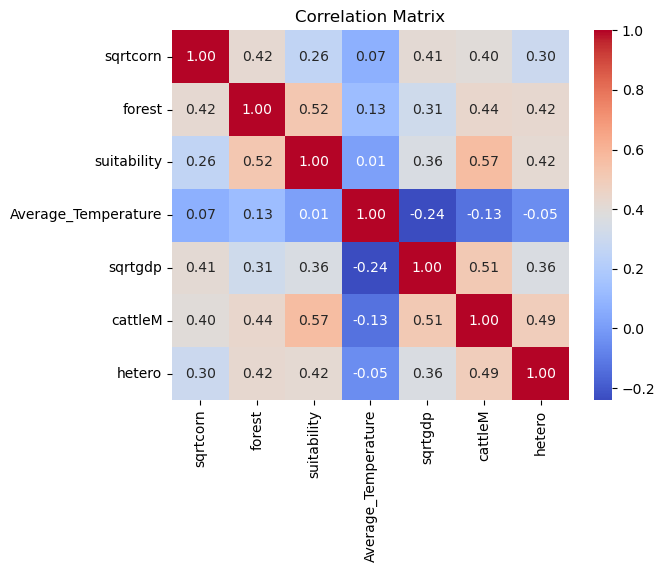

In [189]:
# Combine independent variables and dependent variable for the correlation matrix
variables = df[['sqrtcorn', 'forest', 'suitability', 'Average_Temperature', 'sqrtgdp', 'cattleM', 'hetero']]

# Compute the correlation matrix
correlation_matrix = variables.corr()

# Visualize the correlation matrix using a heatmap
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Highlighting the lack of within-entity variance

In [190]:
fig = px.scatter(df,
           x='sqrtcorn', 
           y='forest', 
           color='country', 
           hover_name='country',
           hover_data=['country','year','sqrtcorn','forest'],
           title='Sqrtcorn on forest scatter plot')

fig.show()

c:\Users\Mert\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">If we look closely, we can see how "flat" the lines are. This lack of within-entity variation has been an issue to run the standard OLS models. Indeed, the dependant variable becomes very correlated with our entity fix effects. This multicollinearity leads to huge standard errors, hence huge confidence intervals and low p-values.</p>

## OLS Hypothesis

<ul><li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
    1. Full rank matrix: No perfect collinearity between our variables. This hypothesis is verified as we managed to derive OLS, which is impossible with colinar variables (impossibility to invert the matrix).</li><li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
    2. Conditional mean of residuals equals = 0: This hypothesis is verified for all our equations as shown in the following histograms where the mean tend to 0 in every plot.</li><li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
        3. Homoskedasticity: We can relax this assumption as we use clustered standard errors thruogh our analysis, that accounts for heteroskedasticity.
    </li><li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
        4. Non-correlation between residuals: We didn't have to test this assumption but a correlation between residuals seems possible.
    </li><li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;">
        5. Normal distribution of residuals: This hypothesis is also not verified. We can see in the diagrams below that the distribution does not follow the normal distribution in red.
    </li style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"></ul>


<p style="font-family: 'Trebuchet', sans-serif; font-size:16px;text-align:justify;line-height: 1.6;"> Another main issue of our model is the correlation of the residuals. Indeed we do not fulfill the basic OLS hypothesis claiming non correlation between the residuals and the variable. We probably still have endogeneity issues along a sub-optimal functional form. We might observe non-linear relationships between variables. To address those issues, we lacked time to search for an appropriate functional form, as the literature on that subjects often use non-OLS methods to address our hypothesis.</p>

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Mert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



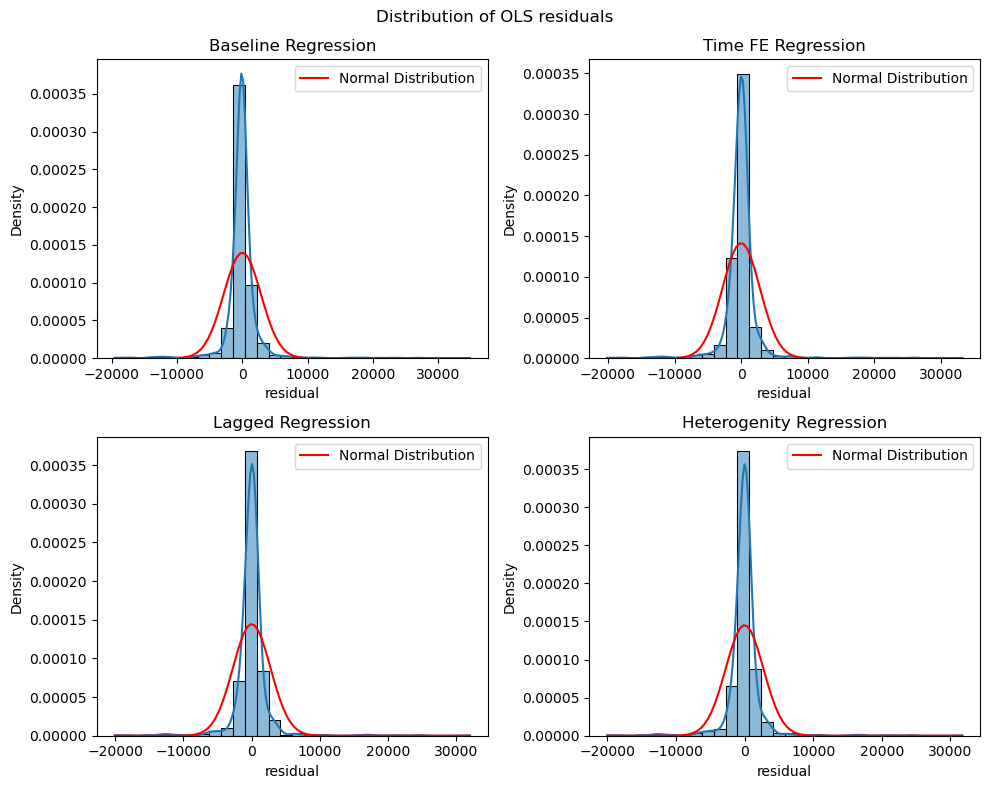

In [191]:
fig, axs = plt.subplots(2,2, figsize=(10,8))

fig.suptitle('Distribution of OLS residuals')

# Baseline Equation
axs[0,0].set_title('Baseline Regression')
sns.histplot(fei_resid, ax=axs[0,0], kde=True, stat='density', bins=30)
# Overlay normal distribution
axs[0,0].plot(np.linspace(min(fei_resid), max(fei_resid), 100), 
              stats.norm.pdf(np.linspace(min(fei_resid), max(fei_resid), 100), np.mean(fei_resid), np.std(fei_resid)), 
              label='Normal Distribution', color='red')
axs[0,0].legend()

# Time FE Equation
axs[0,1].set_title('Time FE Regression')
sns.histplot(feit_resid, ax=axs[0,1], kde=True, stat='density', bins=30)
# Overlay normal distribution
axs[0,1].plot(np.linspace(min(feit_resid), max(feit_resid), 100), 
              stats.norm.pdf(np.linspace(min(feit_resid), max(feit_resid), 100), np.mean(feit_resid), np.std(feit_resid)), 
              label='Normal Distribution', color='red')
axs[0,1].legend()

# Lagged Equation
axs[1,0].set_title('Lagged Regression')
sns.histplot(felag_resid, ax=axs[1,0], kde=True, stat='density', bins=30)
# Overlay normal distribution
axs[1,0].plot(np.linspace(min(felag_resid), max(felag_resid), 100), 
              stats.norm.pdf(np.linspace(min(felag_resid), max(felag_resid), 100), np.mean(felag_resid), np.std(felag_resid)), 
              label='Normal Distribution', color='red')
axs[1,0].legend()

# Time FE Equation
axs[1,1].set_title('Heterogenity Regression')
sns.histplot(felaghetero_resid, ax=axs[1,1], kde=True, stat='density', bins=30)
# Overlay normal distribution
axs[1,1].plot(np.linspace(min(felaghetero_resid), max(felaghetero_resid), 100), 
              stats.norm.pdf(np.linspace(min(felaghetero_resid), max(felaghetero_resid), 100), np.mean(felaghetero_resid), np.std(felaghetero_resid)), 
              label='Normal Distribution', color='red')
axs[1,1].legend()

plt.tight_layout()
plt.show()

## Baseline regression

In [192]:
print(baseline.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 forest   R-squared:                        0.0304
Estimator:                   PanelOLS   R-squared (Between):             -0.0154
No. Observations:                1584   R-squared (Within):               0.0304
Date:                Fri, Dec 20 2024   R-squared (Overall):             -0.0154
Time:                        12:03:18   Log-likelihood                -1.485e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      11.803
Entities:                          72   P-value                           0.0000
Avg Obs:                       22.000   Distribution:                  F(4,1508)
Min Obs:                       22.000                                           
Max Obs:                       22.000   F-statistic (robust):             1.3519
                            

## Baseline + Time Fixed Effects

In [193]:
print(fixedEffects.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 forest   R-squared:                        0.0431
Estimator:                   PanelOLS   R-squared (Between):             -0.0105
No. Observations:                1584   R-squared (Within):              -0.0088
Date:                Fri, Dec 20 2024   R-squared (Overall):             -0.0105
Time:                        12:03:18   Log-likelihood                -1.483e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      16.735
Entities:                          72   P-value                           0.0000
Avg Obs:                       22.000   Distribution:                  F(4,1487)
Min Obs:                       22.000                                           
Max Obs:                       22.000   F-statistic (robust):             1.6990
                            

## Baseline + Time Fixed Effects + Lag

In [194]:
print(lagFE.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 forest   R-squared:                        0.0515
Estimator:                   PanelOLS   R-squared (Between):             -0.0136
No. Observations:                1512   R-squared (Within):               0.0033
Date:                Fri, Dec 20 2024   R-squared (Overall):             -0.0136
Time:                        12:03:18   Log-likelihood                -1.413e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      19.233
Entities:                          72   P-value                           0.0000
Avg Obs:                       21.000   Distribution:                  F(4,1416)
Min Obs:                       21.000                                           
Max Obs:                       21.000   F-statistic (robust):             1.3505
                            

## Baseline + Time Fixed Effects + Lag + Heterogeneity

In [195]:
print(feLagHetero.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 forest   R-squared:                        0.0607
Estimator:                   PanelOLS   R-squared (Between):             -0.0234
No. Observations:                1512   R-squared (Within):               0.0133
Date:                Fri, Dec 20 2024   R-squared (Overall):             -0.0233
Time:                        12:03:18   Log-likelihood                -1.412e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      18.277
Entities:                          72   P-value                           0.0000
Avg Obs:                       21.000   Distribution:                  F(5,1415)
Min Obs:                       21.000                                           
Max Obs:                       21.000   F-statistic (robust):             1.6168
                            